# PIPELINES

<img src="curly.jpg" align="center" width="50%"/>

### Agenda

---

- ¿Qué son pipelines?
    
- Implementación

- GridSearch + Pipelines


### Introducción

---

Un **pipeline** (tubería) es una *serie de pasos automatizados* para transformar nuestros datos con el objetivo de asegurar su validez y consistencia.

**Cada paso se alimenta del paso previo**.

Al ser reutilizables aseguran la *consistencia* en la operación.

Al agrupar operaciones proveen un *mayor nivel de abstracción*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_001_pipeline.jpg" alt="pipeline" width=50% height=40% align="center"/>

### Introducción

---

Sabemos que una parte importante del trabajo de un DataScientist es *la preparación de los datos* previo a la aplicación de los *algoritmos de machine learning*. 

Para ello realizamos *distintas operaciones*: data cleaning, data wrangling, cambios de escala, selección de features, etc. 

Las podemos ver como un **encadenamiento de procesos**, que también pueden incluir *la aplicación y evaluación de los modelos*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_002_pipeline_ejemplo.png" alt="pipeline_ejemplo" width=80% height=60% />

### Pipeline en Scikit-learn

---

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> es una clase de **scikit-learn** cuyo uso más común es facilitar el encadenamiento de pasos de preprocessing junto con un modelo.

`pipeline` es en sí un estimador que tiene los métodos `fit`, `predict` y `score`, igual que otros modelos, por ejemplo `LinearRegression`.

**Todos los pasos encadenados en un `pipeline`, con excepción del último, tienen los métodos `fit` y `transform`, para generar una nueva representación del dato que se usa en el paso siguiente.**

### Implementación de Pipeline

---
El esquema general para implementar `pipeline` es:

**1-** Construir la **lista de los pasos** que se ejecutan en secuencia. 
  
  Cada paso es una *tupla* que contiene un **nombre** (a elección) y la instancia de un **estimador**.  
  
  *Debemos previamente importar las librerías de los métodos que referenciamos*. En este ejemplo, un estimador para escalar los datos y otro para clasificar.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [3]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

---

**2-** Instanciar `pipeline` con los pasos definidos previamente.

In [4]:
pipe = Pipeline(pasos)

In [5]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

Usemos el dataset de vinos (https://archive.ics.uci.edu/dataset/109/wine) para ilustrar el proceso. Lo dividimos en train y test.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

%matplotlib inline

In [7]:
from sklearn.datasets import load_wine
X,y = load_wine(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
print('Total de filas: ',X.shape[0],'Total de columnas: ',X.shape[1])
X.head(2)

Total de filas:  178 Total de columnas:  13


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [8]:
y_train.head()

118    1
107    1
136    2
32     0
80     1
Name: target, dtype: int64

---

**3-** Entrenamos la instancia de `pipeline` con los datos de entrenamiento, mediante el método `fit`.

   - Primero ejecuta para estos datos el *paso 'scaler'*: aplica `.fit` para aprender la media y desvío de la variable, y luego `.transform` para modificar la escala.
   
   - Los datos re-escalados son entrenados (`.fit`) con el modelo, en el paso 'knn'. Recordemos que **el último paso no tiene `.transform`**.

In [9]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

**4-** Evaluamos el modelo generado:

   - El método `predict` evalúa el modelo con los datos de test.
   
   - El método `score` devuelve *accuracy* del modelo. 
       
        Para ello, escala los datos de test  *X_test* con el método `transform` del paso *'scaler'*, y se los pasa a *'knn'*, que aplica el método `score`. 

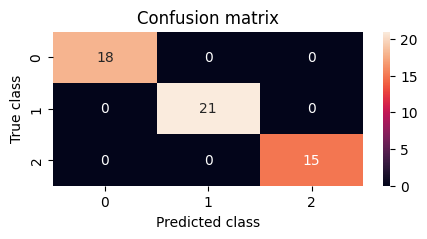

In [10]:
y_pred = pipe.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred); 
plt.figure(figsize=(5, 2)); sns.heatmap(conf_matrix,  annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class');plt.show()

In [11]:
pipe.score(X_test,y_test)

1.0

### Implementación de Pipeline

---
Resumimos lo anterior, asumiendo que **T1** y **T2** son dos pasos de preprocesamiento, y **Classifier** se refiere a un clasificador.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_003_pipeline_pasos.JPG" alt="pipeline_pasos" style="width: 600px;"/>

### make_pipeline

---
Si no queremos darle nombres específicos a los pasos, la clase `make_pipeline`, crea un Pipeline y nombra cada paso en forma automática.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Usando Pipeline:

In [13]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(pasos)

Usando make_pipeline:

In [14]:
from sklearn.pipeline import make_pipeline
makepipe = make_pipeline(StandardScaler(),KNeighborsClassifier())

Para ver el nombre que le puso a cada paso o etapa, podemos usar `.steps`.

In [15]:
makepipe.steps

[('standardscaler', StandardScaler()),
 ('kneighborsclassifier', KNeighborsClassifier())]

### Atributos y parámetros

---
- Los **estimadores** se guardan como lista en el atributo `steps`.

In [16]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(pasos)

In [17]:
# Accedemos al scaler
pipe.steps[0]

('scaler', StandardScaler())

In [18]:
# Accedemos al clasificador
pipe.steps[1]

('knn', KNeighborsClassifier())

In [19]:
dir(pipe.steps[1][1])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'fit',
 'get_metadata_routing',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',


La misma información queda guardada en el atributo `named_steps`pero como un diccionario: 

In [20]:
pipe.named_steps['scaler']

StandardScaler()

- Los **parámetros** de los estimadores los podemos ver con el método `get_params`.

  Tienen el formato **nombre_paso__nombre_parámetro**.
  
  Y se pueden modificar con el método `set_params`.

In [21]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [22]:
pipe.set_params(knn__n_neighbors=4)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

## Combinando pipelines con GridSearch

### Dataset

---
Vamos a trabajar con un archivo de semillas de trigo.

- Las features son propiedades geométricas de las semillas.

- *type_wheat* indica el tipo de semilla: 0 - Kama, 1 - Rosa y 2 - Canadian.

Para más detalles ver <a href="https://archive.ics.uci.edu/ml/datasets/seeds#">aquí</a>.

In [23]:
df = pd.read_csv('data/seeds_dataset.csv')
print('Total de filas: ',df.shape[0],'Total de columnas: ',df.shape[1])
df.sample(4)

Total de filas:  210 Total de columnas:  8


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238,2
180,11.41,12.95,0.8560,5.090,2.775,4.957,4.825,3


Preparamos los archivos de train y test.

In [24]:
X = df.drop(['type_wheat'], axis=1)
y = df['type_wheat']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

In [25]:
print('Totales por Tipo de semilla: \n ',pd.value_counts(df['type_wheat'], sort = True))

Totales por Tipo de semilla: 
  type_wheat
1    70
2    70
3    70
Name: count, dtype: int64


### GridSearch

---
Como vimos en una clase anterior, `GridSearch` busca *la mejor combinación de hiperparámetros* dentro de una **grilla (grid)** especificada previamente. La búsqueda es **exhaustiva para cada valor de la grilla**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_004_gridsearch.JPG" alt="gridsearch" style="width: 250px;"/>

Para cada combinación de valores de los hiperparámetros: 

- los aplica sobre el *dataset de train* --> los *evalua con cross validation* --> *registra el score*.

Al final de todas las búsquedas:

- selecciona la combinación con **más alto score** --> aplica sobre **train** --> predice sobre **test**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_2.png" alt="Drawing" style="width: 550px;"/>

### Pipeline + GridSearch

---
Podemos combinar los dos métodos:

- Generamos nuevamente la lista de pasos que le vamos a pasar a `pipeline` y lo instanciamos.

In [26]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe_grid = Pipeline(pasos)

- Importamos `GridSearchCV` y una clase para definir los kfold del esquema de validación.

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold 

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

- La grilla de hiperparámetros debe identificar **el paso del pipeline y el hiperparámetro** y los valores a evaluar.

   Se indica con la sintaxis: *nombre_paso__nombre_hiperparámetro*.

In [28]:
param_grid = {'knn__n_neighbors':range(2,4,6),
              'knn__weights':['uniform','distance']}

- Se combinan ambos métodos instanciando `GridSearchCV` con 
  - la instancia de `pipeline`.
  - la grilla definida.
  - el método de cross validation.

y luego entrenamos el modelo.

In [29]:
#En vez de pasarle el estimador como generalmente lo hacemos, le pasamos como parámetro el pipeline

grid = GridSearchCV(pipe_grid, param_grid, cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(2, 4, 6),
                         'knn__weights': ['uniform', 'distance']})

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

In [30]:
print('Score: ',grid.best_score_)
grid.best_estimator_

Score:  0.9455172413793104


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

Y la performance con los datos de test:

In [31]:
accuracy_score(grid.best_estimator_.predict(X_test),y_test)

0.9047619047619048

### Pipeline + GridSearch + Preprocessing

---
Ademas de usar `GridSearch` para identificar la mejor configuración del modelo, se puede explorar cuál es la mejor configuración para los pasos previos.

Por ejemplo, evaluar si nos conviene usar para escalar `StandardScaler` o `MinMaxScaler`.

Como antes, generamos nuevamente la lista de pasos que le vamos a pasar a `pipeline` y lo instanciamos. 

**Solo** definimos como paso el uso de `StandardScaler`, a modo de placeholder.

In [32]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe_grid_2 = Pipeline(pasos)

Similarmente, importamos `GridSearchCV` y una clase para definir los k-folds del esquema de validación.

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

- La grilla de hiperparámetros ahora *incluye al paso 'scaler'* y sus valores a evaluar.

   - Nota: No se debe olvidar de importar los métodos a evaluar.
   - Nota 2: **None** significa no escalar. Lo agregamos como otra opción a evaluar.

In [34]:
#Podemos pensar al tipo de preprocesamiento a realizar como otro hiperparámetro a evaluar
from sklearn.preprocessing import MinMaxScaler
param_grid_2 = [{'scaler':[StandardScaler(), MinMaxScaler(),None], 
                   'knn__n_neighbors':range(2,4,6), 
                   'knn__weights':['uniform','distance']}]                

- Combinamos `Pipeline` y `GridSearchCV`, y entrenamos el modelo.

In [35]:
grid_2 = GridSearchCV(pipe_grid_2, param_grid_2, cv=folds)
grid_2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': range(2, 4, 6),
                          'knn__weights': ['uniform', 'distance'],
                          'scaler': [StandardScaler(), MinMaxScaler(), None]}])

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`). 

En este caso, no mejoraron los valores originales (0.945 y 0.904)

In [36]:
print('Score: ',grid_2.best_score_)
grid_2.best_estimator_

Score:  0.9455172413793104


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

Y la performance con los datos de test.

In [37]:
accuracy_score(grid_2.best_estimator_.predict(X_test),y_test)

0.9047619047619048

In [38]:
#Terminó eligiendo el mismo preprocesamiento que el que definimos antes...
grid_2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

### Custom Data Transformers

---
Veamos dos temas que luego integraremos a `Pipeline`.


El package [`preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html) nos ofrece funciones y clases que transforman los datos para adecuarlos a nuestros modelos.

Pero a veces no es suficiente y necesitamos crear nuevas funciones o **Custom Data Transformers**.

Veamos dos maneras en que Scikit-learn nos permite crearlos, y usarlos **en forma estándar** como cualquier otra transformación.

---
Recordemos que nosotros aplicamos las transformaciones mediante los métodos de la clase  `.fit`, `.transform` y `.fit_transform`.

Por ejemplo, `StandardScaler`:

In [39]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaler = pd.DataFrame(scaler.transform(X_test))

- Una opción es usar la función `FunctionTransformer` de `preprocessing`.  Convierte una función Python **ya existente** en un transform.

  Por ejemplo, definimos un transform para calcular la media. Observemos que lo usamos como cualquier otro. 

In [40]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.mean)

df_mean = transformer.transform(df)
df_mean

6.284152321428572

### Custom Data Transformers

---
Otra forma de crear *Custom Data Transformers* es **heredar** los métodos de las clases de `scikit-learn` para tenerlos disponibles en nuestras propias clases.

Por un lado, [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) permite heredar los métodos `get_params` y `set_params`.

Por otro lado, [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) permite obtener los métodos `.fit`, `.transform` y `.fit_transform`.

---
Supongamos que hacemos un transformer que multiplica la entrada por un valor determinado.

Primero importamos las clases:

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

Definimos nuestra propia clase.

- Le pasamos las clases `BaseEstimator`y `TransformerMixin` para que herede los métodos de scikit-learn.

-  `___init___` es el constructor. Donde definimos los parámetros que recibimos.

- `fit` no es requerido. Solo transformamos.

- `transform` indica lo que haremos con los datos.

In [42]:
class FeatureMultiplier(BaseEstimator, TransformerMixin):
    
    def __init__(self,factor):
        self.factor = factor
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X * self.factor

Ahora generamos una instancia de la clase:

In [43]:
fm = FeatureMultiplier(2)
fm

FeatureMultiplier(factor=2)

Y transformamos un dato:

In [44]:
test = np.diag((1,2,3))
test_t = fm.transform(test)

print('Dato Original'); print(test); print('Dato transformado'); print(test_t)

Dato Original
[[1 0 0]
 [0 2 0]
 [0 0 3]]
Dato transformado
[[2 0 0]
 [0 4 0]
 [0 0 6]]


### Feature Union

---
[`FeatureUnion`](https://scikit-learn.org/stable/modules/compose.html#featureunion-composite-feature-spaces) combina varios transformadores, y devuelve los outputs concatenados.

Es decir, aplica a los datos una serie de transformadores en forma paralela, y luego concatena la salida de ellos *en una única matriz*. 

Util para combinar *mecanismos de extracción de features* en un sólo transformador.

En este ejemplo `FeatureUnion` recibe tres transform para distintos tipos de features, concatena las salidas, y las entrega como un unico dataset al modelo.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_005_features_union.jpg" alt="features_union" width=80% height=60% />

### Pipeline - Resultado final

---
Ahora vamos a unir todos los conceptos para armar un proceso completo con `Pipeline`.

- Creamos dos `custom data transformers`. Uno selecciona un conjunto de features, el otro devuelve una feature discretizada.

- Generamos dos conjuntos de features usando `FeatureUnion` y los transformers.

- `GridSearch` ahora evalúa y selecciona una opción de cada grupo:
   - Los dos conjuntos de features.
   - Los métodos de preprocesamiento: StandardScaler(), MinMaxScaler(), None.
   - Los hiperparámetros `n_neighbors` y `weights`.

In [45]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold 

In [46]:
df.head(1)

,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1


- Creamos los dos custom data transformers.

In [47]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [48]:
class FeatureDiscretize(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(pd.qcut(X[self.selected_features], 10, labels=False))

### Pipeline - Resultado final

---

- Creamos los dos conjuntos de features a evaluar usando `FeatureUnion` y los dos `Custom Transformers`.

In [49]:
#Prueba con dos alternativas de FeatureUnion

# Primer FeatureUnion: selecciona 2 features y discretiza otro
union_1=FeatureUnion([('select',FeatureSelection(selected_features=['area','perimeter'])),
                    ('discret',FeatureDiscretize(selected_features='length_groove'))])

In [50]:
# Segundo FeatureUnion: selecciona 4 features y discretiza otro
union_2=FeatureUnion([('select',FeatureSelection(selected_features=['area','perimeter','length','width'])),
                    ('discret',FeatureDiscretize(selected_features='compactness'))])

- Ahora generamos como siempre la lista de pasos.

In [51]:
pasos= [('feature_engineering',union_1),
        ('preprocesamiento',StandardScaler()),
        ('clasificador',KNeighborsClassifier())]

pasos= [('feature_engineering',None),
        ('preprocesamiento',None),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_final=Pipeline(pasos)

- Definimos la grilla para el`GridSearch` y entrenamos el modelo en Train.

  En la etapa **feature_engineering** tenemos para evaluar los dos conjuntos de features transformadas.

In [52]:
param_grid_final = [{'feature_engineering':[union_1,union_2],
                   'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
                   'clasificador__n_neighbors':range(2,4,6), 'clasificador__weights':['uniform','distance']}]

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_final=GridSearchCV(pipe_grid_final, param_grid_final, cv=folds)

grid_final.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering', None),
                                       ('preprocesamiento', None),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             param_grid=[{'clasificador__n_neighbors': range(2, 4, 6),
                          'clasificador__weights': ['uniform', 'distance'],
                          'feature_engineering': [FeatureUnion(transformer_list=...
                                                                                  FeatureSelection(selected_features=['area',
                                                                                                                      'perimeter'])),
                                                                                 ('discret',
                                                                                  FeatureDiscretize(selected_features='length_groove'))]),
                                                  FeatureUnion(transformer_list=[('select',
                                                                                  FeatureSelection(selected_features=['area',
                                                                                                                      'perimeter',
                                                                                                                      'length',
                                                                                                                      'width'])),
                                                                                 ('discret',
                                                                                  FeatureDiscretize(selected_features='compactness'))])],
                          'preprocesamiento': [StandardScaler(), MinMaxScaler(),
                                               None]}])

¿Qué cantidad de combinaciones transformador - modelo va a probar?
<br>2 Feature Engineering x 3 Preprocesamiento x 3 clasificador__n_neighbors x 2 clasificador__weights = 36

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

El score bajó respecto a lo realizado anteriormente.

In [53]:
print('Score: ',grid_final.best_score_)
grid_final.best_estimator_

#Termina eligiendo FeatureUnion1

Score:  0.8841379310344827


Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=['area',
                                                                                     'perimeter'])),
                                                ('discret',
                                                 FeatureDiscretize(selected_features='length_groove'))])),
                ('preprocesamiento', None),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

Y la performance con los datos de test.

In [54]:
accuracy_score(grid_final.best_estimator_.predict(X_test),y_test)

0.9047619047619048

### BONUS TRACK: COMBINANDO PIPELINES CON TÉCNICAS PARA DATASETS DESBALANCEADOS

Si queremos combinar algoritmos de balanceo de clases con pipelines, tenemos que usar la clase Pipeline de imblearn (en la práctica funciona igual a Pipeline de sklearn).

In [55]:
data_c3=pd.read_csv('data/creditcard.zip')
data_c3_f=data_c3.sample(n=10000)

In [56]:
x = data_c3_f.drop(columns=['Class'])
y = data_c3_f['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state=42)

In [57]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.metrics import classification_report

pasos = [('balanced', RandomUnderSampler()), ('xgb', XGBClassifier())]
pipe = Pipeline_imb(pasos)
pipe.fit(X_train,y_train)
pipe._final_estimator
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1998
           1       0.01      0.50      0.02         2

    accuracy                           0.95      2000
   macro avg       0.50      0.73      0.50      2000
weighted avg       1.00      0.95      0.97      2000



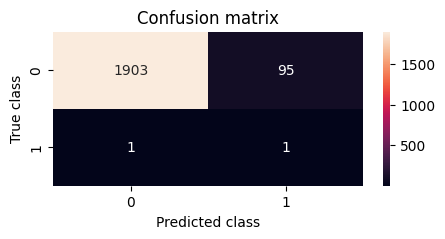

In [58]:
y_pred = pipe.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred); 
plt.figure(figsize=(5, 2)); sns.heatmap(conf_matrix,  annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class');plt.show()

¿Podemos usar Random Search con Pipelines? ¡Claro que sí!

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV 
from scipy import stats

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

param_dist = {'xgb__max_depth': stats.randint(1,50),
              'xgb__learning_rate': stats.uniform(0.01, 0.5),
              'xgb__subsample': stats.uniform(0.1, 1),
              'xgb__colsample_bytree': stats.uniform(0.1, 1),
              'xgb__min_child_weight': stats.randint(1,4),
              'xgb__n_estimators': stats.randint(50, 1000)
             }

param_grid = [{'balanced':[RandomUnderSampler(), RandomOverSampler(), SMOTE(), None]}]
param_grid[0].update(param_dist) 

xgb_random = RandomizedSearchCV(pipe, param_grid, cv=folds, verbose=1, n_jobs=7,scoring='roc_auc',n_iter=20,random_state=42)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('balanced', RandomUnderSampler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_ty...
                                         'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce6168e4c0>,
                                         'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce6168e880>,
                                         'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce6168ec40>,
                                         'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fce6168eb20>}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [60]:
print('Score: ',xgb_random.best_score_)
xgb_random.best_estimator_

Score:  0.997421445755905


Pipeline(steps=[('balanced', RandomOverSampler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.425183322026747,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.37480308916903204, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=40,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, n_estimators=596,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [61]:
#Podemos ver todas las combinaciones de hiperparámetros más métodos de balanceo que usó

lista_params=xgb_random.cv_results_['params']

for i,el in enumerate(lista_params):
    lista_params[i]['ranking']=xgb_random.cv_results_['rank_test_score'][i]
    lista_params[i]['mean_score']=xgb_random.cv_results_['mean_test_score'][i]
sorted(lista_params, key=lambda d: d['ranking']) 

[{'balanced': RandomOverSampler(),
  'xgb__colsample_bytree': 0.425183322026747,
  'xgb__learning_rate': 0.37480308916903204,
  'xgb__max_depth': 40,
  'xgb__min_child_weight': 2,
  'xgb__n_estimators': 596,
  'xgb__subsample': 0.5722149251619493,
  'ranking': 1,
  'mean_score': 0.997421445755905},
 {'balanced': RandomOverSampler(),
  'xgb__colsample_bytree': 0.49106060757324077,
  'xgb__learning_rate': 0.10111804389403116,
  'xgb__max_depth': 4,
  'xgb__min_child_weight': 2,
  'xgb__n_estimators': 439,
  'xgb__subsample': 0.3079416628681888,
  'ranking': 2,
  'mean_score': 0.9946871915229526},
 {'balanced': None,
  'xgb__colsample_bytree': 0.9324426408004217,
  'xgb__learning_rate': 0.11616955533913807,
  'xgb__max_depth': 21,
  'xgb__min_child_weight': 1,
  'xgb__n_estimators': 509,
  'xgb__subsample': 0.7116531604882809,
  'ranking': 3,
  'mean_score': 0.9946561770738681},
 {'balanced': RandomOverSampler(),
  'xgb__colsample_bytree': 0.8272719958564209,
  'xgb__learning_rate': 0.173

# Conclusiones

---
Usar `pipeline` tiene algunas ventajas: 

- Facilita la creación de un flujo de trabajo coherente y fácil de entender.

- Reproducibilidad.

- Combinación con `GridSearch` para la selección de los hiperparámetros.

- Combinación con `Custom Data Transformers` y `FeatureUnion` para persistir la transformación y selección de las features en el mismo proceso.


### Ejercicio

----

A partir del dataset de semillas de trigo, vamos a usar `Pipeline` para crear un flujo de trabajo.

In [62]:
df = pd.read_csv('data/seeds_dataset.csv')
print('Total de filas: ',df.shape[0],'Total de columnas: ',df.shape[1])
df.sample(2)

Total de filas:  210 Total de columnas:  8


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
41,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,1
75,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,2


Preparamos los archivos de train y test.

In [63]:
X = df.drop(['type_wheat'], axis=1)
y = df['type_wheat']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

Vamos a usar nuevamente las dos `Custom Data Transformers`:

In [64]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [65]:
class FeatureDiscretize(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(pd.qcut(X[self.selected_features], 10, labels=False))

### Ejercicio

----

Generamos un conjunto de features usando:
- `FeatureSelection` para seleccionar 'area','length','width','coefficient'.
- `FeatureDiscretize` para discretizar 'perimeter'.

In [66]:
union=FeatureUnion([('select',FeatureSelection(selected_features=['area','length','width','coefficient'])),
                    ('discret',FeatureDiscretize(selected_features='perimeter'))])

- Generamos la lista de pasos y la instancia para `Pipeline`:
  - 'feature_engineering' para el conjunto de features.
  - 'preprocesamiento' para `StandardScaler()`.
  - 'clasificador' para `KNeighborsClassifier()`.

In [67]:
pasos= [('feature_engineering',union),
        ('preprocesamiento',StandardScaler()),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_handson=Pipeline(pasos)

- Definimos la grilla para el `GridSearch` y entrenamos el modelo en Train.

  - No incluimos la etapa 'feature_engineering' para evaluar, pues tenemos un conjunto de features.
  - Para la etapa 'preprocesamiento' comparamos `StandardScaler()` y `MinMaxScaler()`
  - Para la etapa 'clasificador' evaluamos los hiperparámetros `n_neighbors` y `weights`, con los valores (2,4,6) y ('uniform','distance') respectivamente.

In [68]:
param_grid_handson = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                   'clasificador__n_neighbors':range(2,4,6), 'clasificador__weights':['uniform','distance']}]

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_handson=GridSearchCV(pipe_grid_handson, param_grid_handson, cv=folds)

grid_handson.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=['area',
                                                                                                            'length',
                                                                                                            'width',
                                                                                                            'coefficient'])),
                                                                       ('discret',
                                                                        FeatureDiscretize(selected_features='perimeter'))])),
                                       ('preprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             param_grid=[{'clasificador__n_neighbors': range(2, 4, 6),
                          'clasificador__weights': ['uniform', 'distance'],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}])

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

In [69]:
print('Score: ',grid_handson.best_score_)
grid_handson.best_estimator_

Score:  0.8977011494252872


Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=['area',
                                                                                     'length',
                                                                                     'width',
                                                                                     'coefficient'])),
                                                ('discret',
                                                 FeatureDiscretize(selected_features='perimeter'))])),
                ('preprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

Y la performance con los datos de test.

In [70]:
accuracy_score(grid_handson.best_estimator_.predict(X_test),y_test)

0.873015873015873

# MÁS EJERCICIOS

## 1. Introducción
En este Lab vamos a crear Pipelines para pre-procesar datos y extraer características sobre el [Titanic dataset](http://www.kaggle.com/c/titanic-gettingStarted/data).

El dataset es una lista de pasajeros del trasatlántico más famoso. La segunda columna del dataset ("survived") indica si la persona ha sobrevivido (1) o no (0) al naufragio. El resto de las columnas contienen información diversa sobre cada uno de los pasajeros.

* Levantamos el dataset (Titanic.csv) en un DataFrame.

In [71]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('Data/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Usemos el método info para dar un vistazo a los datos:

- Hay características numéricas?
- Hay características categóricas?
- Hay datos incompletos? En qué columnas?
- Cuáles te parecen importantes para rellenar?

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [74]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Preprocesando cada grupo de columnas

Observamos que el preprocesamiento de los datos requiere distintos enfoques para distintos tipos de columnas: algunas requieren imputación, otras requieren generar variables Dummies y otras sería conveniente estandarizarlas.

La idea es armar un pipeline separado para el preprocesamiento que necesita cada grupo de variables y luego unirlos todos con el método [`make_union`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_union.html) que ejecutará todos los pipelines para luego concatenar el resultado.

Para hacer las transformaciones de cada grupo de columnas sugerimos crear un transformer de sklearn ColumnSelector que permita seleccionar un grupo de columnas del DataFrame donde queremos aplicar las transformaciones.

## 2. Edad

Se puede observar que hay varios pasajeros sin información de edad (columna "Age"). Vamos a intentar llenar los datos de esta columna. Exploremos la distribución de valores para los datos existentes y pensemos una estrategia.

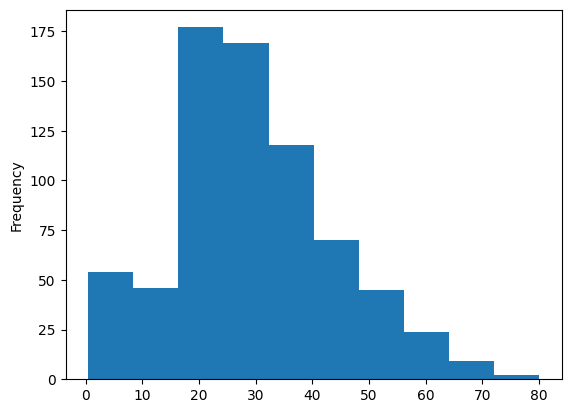

In [75]:
df.Age.plot(kind = 'hist');

### 2.b Transformador de Edad

Dependiendo la estrategia que hayamos decido vamos a necesitar imputar los datos de edad faltantes, ya sea usando un transformador del módulo de pre-procesamiento o crear un transformador custom transformer.
Esto podría implicar:

- Seleccionar una o más columnas
- Llenar los datos faltantes
- Escalar los valores de Edad

In [76]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [77]:
class ColumnSelection(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, *_):
        return self

    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")

cs = ColumnSelection('Age')

cs.transform(df).head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [82]:
pasos = [('select', ColumnSelection('Age')),
        ('imputer', SimpleImputer()),
        ('scale', StandardScaler())]

age_pipe = Pipeline(pasos)

age_pipe.fit_transform(df)

array([[-0.5924806 ],
       [ 0.63878901],
       [-0.2846632 ],
       [ 0.40792596],
       [ 0.40792596],
       [ 0.        ],
       [ 1.87005862],
       [-2.13156761],
       [-0.20770885],
       [-1.20811541],
       [-1.97765891],
       [ 2.17787603],
       [-0.7463893 ],
       [ 0.71574336],
       [-1.20811541],
       [ 1.94701297],
       [-2.13156761],
       [ 0.        ],
       [ 0.10010856],
       [ 0.        ],
       [ 0.40792596],
       [ 0.33097161],
       [-1.13116105],
       [-0.1307545 ],
       [-1.66984151],
       [ 0.63878901],
       [ 0.        ],
       [-0.82334365],
       [ 0.        ],
       [ 0.        ],
       [ 0.79269771],
       [ 0.        ],
       [ 0.        ],
       [ 2.79351083],
       [-0.1307545 ],
       [ 0.94660642],
       [ 0.        ],
       [-0.66943495],
       [-0.900298  ],
       [-1.20811541],
       [ 0.79269771],
       [-0.20770885],
       [ 0.        ],
       [-2.05461326],
       [-0.82334365],
       [ 0

## 3. Variables Categóricas

"Embarked" y "Pclass" son variables categóricas. Usá la función [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) de pandas para crear columnas correspondientes a los valores de las mismas.

"Embarked" tiene un par de datos faltantes. Llenalos con el puerto de embarque más común en el dataset.

Sugerencia: Crear un transformador custom que "envuelva" el uso de get_dummies.

In [83]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [84]:
# Rellena los dos nulos con la clase mas poblada.
df.Embarked = df.Embarked.fillna('S')
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [85]:
pd.get_dummies(pd.DataFrame(df['Embarked'].head()))

,Embarked_C,Embarked_S
0,False,True
1,True,False
2,False,True
3,False,True
4,False,True


In [86]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.get_dummies(X[self.columns], columns = self.columns, drop_first = True)
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self

In [87]:
gdt = GetDummiesTransformer(['Embarked'])
gdt.fit_transform(df).head()

dummies_pipe = make_pipeline(GetDummiesTransformer(['Pclass', 'Embarked', 'Sex']),
                             StandardScaler())

dummies_pipe.fit_transform(df)

array([[-0.51015154,  0.90258736, -0.30756234,  0.61583843,  0.73769513],
       [-0.51015154, -1.10792599, -0.30756234, -1.62380254, -1.35557354],
       [-0.51015154,  0.90258736, -0.30756234,  0.61583843, -1.35557354],
       ...,
       [-0.51015154,  0.90258736, -0.30756234,  0.61583843, -1.35557354],
       [-0.51015154, -1.10792599, -0.30756234, -1.62380254,  0.73769513],
       [-0.51015154,  0.90258736,  3.25137334, -1.62380254,  0.73769513]])

## 4. Tarifa

Escalar el atributo "Fare" (Tarifa) usando uno de los escaladores existentes en el módulo de preprocesamiento. 

In [89]:
fare_pipe = make_pipeline(ColumnSelection('Fare'),
                          StandardScaler())

fare_pipe.fit_transform(df.head())

array([[-0.81614059],
       [ 1.53034706],
       [-0.79140535],
       [ 0.86402362],
       [-0.78682475]])

## 5. Otras columnas

In [91]:
other_pipe = make_pipeline(ColumnSelection(['SibSp', 'Parch']))

## 6. Union

Utilizá una FeatureUnion o la función make_union para combinar todos los pipelines que has creado.

In [92]:
union = make_union(age_pipe,
                   dummies_pipe,
                   fare_pipe,
                   other_pipe)

union.fit_transform(df.head())

array([[-1.50516598,  0.81649658,  0.5       ,  1.22474487, -0.81614059,
         1.        ,  0.        ],
       [ 1.11251398, -1.22474487, -2.        , -0.81649658,  1.53034706,
         1.        ,  0.        ],
       [-0.85074599,  0.81649658,  0.5       , -0.81649658, -0.79140535,
         0.        ,  0.        ],
       [ 0.62169899, -1.22474487,  0.5       , -0.81649658,  0.86402362,
         1.        ,  0.        ],
       [ 0.62169899,  0.81649658,  0.5       ,  1.22474487, -0.78682475,
         0.        ,  0.        ]])

## 7. Predicciones

Ahora utilicemos GridSearch para evaluar la performance de estas transformaciones, seguidas de un modelo de regresión logística. 
Para esto exploren distintos valores de parámetros para C.

Primero separar las X y las y

In [93]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((596, 7), (295, 7), (596,), (295,))

Aplicar el `pipeline` con todos los objetos transformadores del dataframe

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [96]:
pipeline = Pipeline([('union', union), 
                     ('log', LogisticRegression(solver='liblinear'))])

parameters = {'log__penalty': ['l1', 'l2'],
              'log__C': [0.01, 0.1, 1, 10, 100]}

In [98]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [99]:
grid_search.fit(pd.DataFrame(X_train, columns=X.columns), y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('select',
                                                                                         ColumnSelection(columns='Age')),
                                                                                        ('imputer',
                                                                                         SimpleImputer()),
                                                                                        ('scale',
                                                                                         StandardScaler())])),
                                                                       ('pipeline-2',
                                                                        Pipeline(steps=[('getdummiestransformer',
                                                                                         GetDummiesTransformer(colu...
                                                                                         StandardScaler())])),
                                                                       ('pipeline-3',
                                                                        Pipeline(steps=[('columnselection',
                                                                                         ColumnSelection(columns='Fare')),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('pipeline-4',
                                                                        Pipeline(steps=[('columnselection',
                                                                                         ColumnSelection(columns=['SibSp',
                                                                                                                  'Parch']))]))])),
                                       ('log',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=5,
             param_grid={'log__C': [0.01, 0.1, 1, 10, 100],
                         'log__penalty': ['l1', 'l2']})

In [100]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.805
Best parameters set:
	 log__C: 0.01
	 log__penalty: 'l2'


#### Performance sobre datos nuevos

In [101]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       175
           1       0.79      0.69      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.79       295
weighted avg       0.80      0.80      0.80       295

0.8


# BIBLIOGRAFÍA

---

<a href="https://scikit-learn.org/stable/data_transforms.html" target="_blank">Data Transform - Scikit-learn</a>

<a href="https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-ef792bbb3260" target="_blank">Pipelines & Custom Transformers in Scikit-learn</a>

<a href="https://medium.com/analytics-vidhya/scikit-learn-pipelines-with-custom-transformer-a-step-by-step-guide-9b9b886fd2cc" target="_blank">Scikit-Learn Pipelines with Custom Transformer — A Step by Step Guide.</a>
